In [3]:
import pandas as pd
from clean_crash_data import crash_data

c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:4: DtypeWarning: Columns (8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_raw = pd.read_csv("Traffic_Crash_Reports__CPD_.csv")
c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crash_data.loc[:, 'CRASHDATE'] = pd.to_datetime(crash_data.CRASHDATE)
c:\Users\Ern\Documents\projects\cincy_traffic\clean_crash_data.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crash_data.loc[:, 'DA

# Where are crashes happening most frequently?

In [4]:
crash_data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique()

,LOCALREPORTNO
ADDRESS_X,
% N I75 AT 2.7%,1
0-X W 562 AT I75,4
0-X W NORWOOD LATERAL,9
0.0X S I71 EX,1
0.X E NORWOOD LATERAL,7
...,...
XX WILLIAM HOWARD,2
XX WILLIAM HOWARD TAFT,19
XX WILLIAM HOWARD TAFT RD,156


It looks like there are very few locations where there are more than 100 traffic incidents.

In [ ]:
data.ADDRESS_X.nunique()

13573

<AxesSubplot: xlabel='ADDRESS_X'>

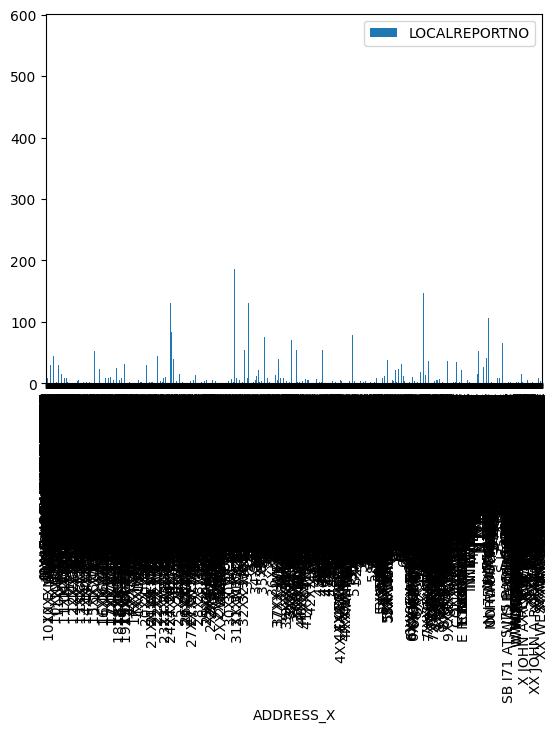

In [ ]:
data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique().plot(kind='bar')

There are 13,573 unique addresses out of 328,558 records / 169,706 reports.

In [ ]:
addr_incs = data[['ADDRESS_X', 'LOCALREPORTNO']]

In [ ]:
addr_incs_grp = addr_incs.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False)

<AxesSubplot: xlabel='ADDRESS_X'>

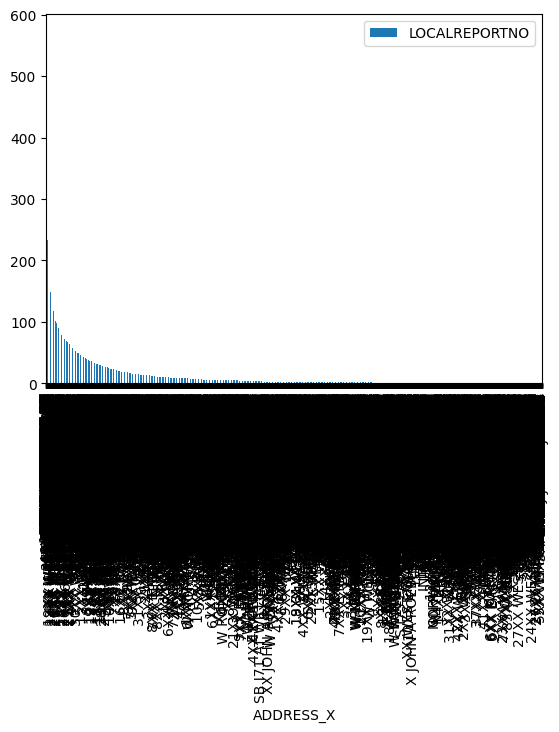

In [ ]:
addr_incs_grp.plot(kind='bar')

In [ ]:
addr_incs_grp.describe()

,LOCALREPORTNO
count,13573.000000
mean,12.502100
std,29.245965
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,573.000000


While most addresses have 10 or fewer crashes over the last decade, the most crashes that have occurred at a single address is 573! Let's look at the top 25%.

In [ ]:
top_qtr = addr_incs_grp.loc[addr_incs_grp.LOCALREPORTNO > 10]

In [ ]:
top_qtr_data = data[data.ADDRESS_X.isin(top_qtr.index)]

In [ ]:
top_qtr_data.LOCALREPORTNO.nunique()

140992

In [ ]:
top_qtr_data.groupby('ADDRESS_X').nunique().sort_values(by='LOCALREPORTNO', ascending=False)['LOCALREPORTNO']

ADDRESS_X
2XX W MITCHELL AV      573
1XX W MITCHELL AV      482
61XX GLENWAY AV        470
2XX CALHOUN ST         404
44XX COLERAIN AV       394
                      ... 
4XX LIBERTY HILL ST     11
51XX GRAFTON AV         11
17XX ESMONDE ST         11
51XX RIDGE AV           11
32XX BEEKMAN            11
Name: LOCALREPORTNO, Length: 3205, dtype: int64

2XX W Mitchell Avenue is the location with 573 crashes. Interestingly, 1XX W Mitchell Avenue is the next highest at 482 crashes.

In [ ]:
w_mitchell_avenue = data.where(data.ADDRESS_X.str.contains('W MITCHELL AV', case=False))

KeyboardInterrupt: 